In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scipy.optimize as optimize
import datetime

# Important:  don't spend too much time on this notebook

We've kept the questions in this notebook down to a minimum.  While there are a couple of new concepts here, the second notebook has a lot more new concepts.   

### Variances and covariances:

The variance is a measure of the scatter of a quantity.

$\sigma^2 = \frac{\sum_i (x_i - \mu_x)}{n}^2$

Where $\mu_x$ is the mean of the measurements $\mu_x = \frac{\sum_i x_i}{n}$

The covariance is a measure of variantions in one quantity match variations in a second quantity.  

The equation for the covariance is quite similar to the equation for the variance:

$\sigma_{xy} = \frac{\sum_i (x_i - \mu_x) (y_i - \mu_y)}{n}$

I.e., we replace one of the factors of $(x_i - \mu_x)$ with $(y_i - \mu_y)$.

A couple of things to notice about the correlation:

1. If, for a given pair of values, both $x$ and $y$ have the same sign, (i.e., they are both above or below the average, then $(x_i - \mu_x) (y_i - \mu_y)$ will be greater than zero.  Conversely, if they have opposite signs, then $(x_i - \mu_x) (y_i - \mu_y)$ will be less than zero.   Thus, the covarience can be either positive or negative.

2. Pairs of values where the absolute values $|(x_i - \mu_x)|$ and $|(y_i - \mu_y)|$ are both large will contribute a lot to the covarience.  Pairs where one of the values is very close to the mean will contribute very little.

Because the equations for the variance and covariance are so similar, we often compute both the variances and covariances at the same time and put all the results in an array or matrix.


### Let's make a couple of functions to simulate 2D with different level of correlations

The draw_2d_gaussian function above draws data from a pair of gaussians with:

$\mu_x = \mu_y = 0$  -> means of Gaussians, (they are both centered at zero)

$\sigma_{xx}$ -> variance of Gaussian for variable x

$\sigma_{yy}$ -> variance of Gaussian for variable y

$\sigma_{xy}$ -> covariance of Gaussian for variables x and y

You can safely ignore the details of the functions.  This point here is to visualize the resulting scatter plots and measure the covariances.


In [94]:
def gen_2d_gaussian(n, sigma_xx, sigma_yy, sigma_xy):
    
    K_0 = np.array([[sigma_xx, sigma_xy],[sigma_xy, sigma_yy]])
    epsilon = 0.0001
    K = K_0 + epsilon*np.identity(2)
    L = np.linalg.cholesky(K)
    u = np.random.normal(size=2*n).reshape(2, n)
    x = np.dot(L, u)
    return x

In [95]:
def draw_2d_gaussian(axes, n, sigma_xx, sigma_yy, sigma_xy):
    vals = gen_2d_gaussian(n, sigma_xx, sigma_yy, sigma_xy)
    _ = axes.set_xlim(-5, 5)
    _ = axes.set_ylim(-5, 5)
    _ = axes.scatter(vals[0], vals[1])
    return vals

### Effect of changing the covariance, $\sigma_{xy}$.

Let's make 4 plots with unit variances and with 4 different values of the covariance.

Covariance matrix for plot 0,0:
 [[0.94626806 0.05131841]
 [0.05131841 0.99182591]]
Covariance matrix for plot 0,1:
 [[0.99522687 0.99552578]
 [0.99552578 0.99601019]]
Covariance matrix for plot 1,0:
 [[ 0.96500924 -0.96485173]
 [-0.96485173  0.96487914]]
Covariance matrix for plot 1,1:
 [[0.92506972 0.40431045]
 [0.40431045 0.93357685]]


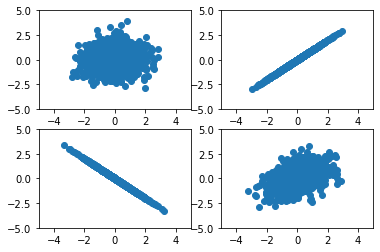

In [121]:
fig = plt.figure()
axes = fig.subplots(2,2)
vals_0 = draw_2d_gaussian(axes[0,0], 1000, 1, 1, 0)
vals_1 = draw_2d_gaussian(axes[0,1], 1000, 1, 1, 1)
vals_2 = draw_2d_gaussian(axes[1,0], 1000, 1, 1, -1)
vals_3 = draw_2d_gaussian(axes[1,1], 1000, 1, 1, 0.5)

print("Covariance matrix for plot 0,0:\n", np.cov(vals_0))
print("Covariance matrix for plot 0,1:\n", np.cov(vals_1))
print("Covariance matrix for plot 1,0:\n", np.cov(vals_2))
print("Covariance matrix for plot 1,1:\n", np.cov(vals_3))

### Effect of changing the varianes, $\sigma_{xx}, \sigma_{yy}$.

Let's make 4 plots with different variances.

Covariance matrix for plot 0,0:
 [[1.01663787 0.02719878]
 [0.02719878 0.9523671 ]]
Covariance matrix for plot 0,1:
 [[0.18836675 0.00696536]
 [0.00696536 0.97793185]]
Covariance matrix for plot 1,0:
 [[0.95776368 0.03212939]
 [0.03212939 0.19635596]]
Covariance matrix for plot 1,1:
 [[0.19629542 0.17890706]
 [0.17890706 0.20074534]]


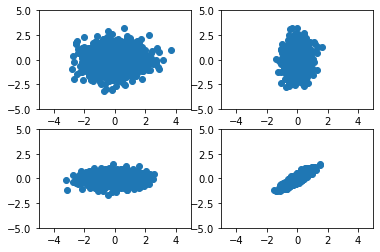

In [122]:
fig = plt.figure()
axes = fig.subplots(2,2)
vals_0 = draw_2d_gaussian(axes[0,0], 1000, 1, 1, 0)
vals_1 = draw_2d_gaussian(axes[0,1], 1000, 0.2, 1, 0)
vals_2 = draw_2d_gaussian(axes[1,0], 1000, 1, 0.2, 0)
vals_3 = draw_2d_gaussian(axes[1,1], 1000, 0.2, 0.2, 0.18)

print("Covariance matrix for plot 0,0:\n", np.cov(vals_0))
print("Covariance matrix for plot 0,1:\n", np.cov(vals_1))
print("Covariance matrix for plot 1,0:\n", np.cov(vals_2))
print("Covariance matrix for plot 1,1:\n", np.cov(vals_3))

# Questions for discussion

1.1 The plots above where made by simulating data from Gaussian distribtions.  Describe some pairs of real world quantities that might be a) highly correlated, b) high anti-correleted, c) uncorrelated, d) measured in the same units, but with a much larger variance in x than in y.

1.2 The variances and co-variances are nice summary statistics for distributions of data.  For Gaussian distributions they pretty much capture all the relevant information.  (I.e., with the means, variances and covariences for a set of data points, you pretty much know exactly what the scatter plots look like).   However, for real world data they might leave of some very important information. 

Imagine a distributions of points shaped like letter U or V or M or W.    What would you expect the covariance to be in each case?  (Trick question).   Why might that make using the covariance as a summary statistic problematic?

### Another way to consider correlations is to ask what part of the variance in one quantity is  tied to the variance of another quanity.

To do this, we want to factor out the variances of the two quantities.

$c_{xy} = \frac{\sigma_{xy}}{\sqrt{\sigma_{xx}\sigma_{yy}}}$

Note that $c_{xx} = c_{yy} = 1$, i.e., each quantity is 100% correlated with itself.

Let's remake the second set of plots and evaluate the correlations.


Corrleation matrix for plot 0,0:
 [[ 1.         -0.02500239]
 [-0.02500239  1.        ]]
Correlation matrix for plot 0,1:
 [[1.        0.0010095]
 [0.0010095 1.       ]]
Correlation matrix for plot 1,0:
 [[1.         0.02371519]
 [0.02371519 1.        ]]
Correlation matrix for plot 1,1:
 [[1.         0.91006688]
 [0.91006688 1.        ]]


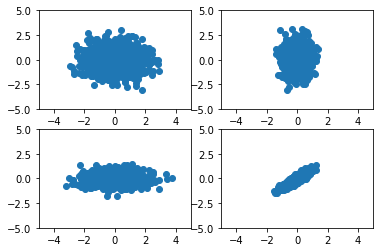

In [123]:
fig = plt.figure()
axes = fig.subplots(2,2)
vals_0 = draw_2d_gaussian(axes[0,0], 1000, 1, 1, 0)
vals_1 = draw_2d_gaussian(axes[0,1], 1000, 0.2, 1, 0)
vals_2 = draw_2d_gaussian(axes[1,0], 1000, 1, 0.2, 0)
vals_3 = draw_2d_gaussian(axes[1,1], 1000, 0.2, 0.2, 0.18)

print("Corrleation matrix for plot 0,0:\n", np.corrcoef(vals_0))
print("Correlation matrix for plot 0,1:\n", np.corrcoef(vals_1))
print("Correlation matrix for plot 1,0:\n", np.corrcoef(vals_2))
print("Correlation matrix for plot 1,1:\n", np.corrcoef(vals_3))

# Question for discussion

2.1 What do you see as the advantage / disadvantage of using the correlation coefficiant versus the covariance?

### Ok, let's load up the Vela data

This is the same stuff we used to load the data last week.  

In [124]:
data = np.loadtxt(open("../data/Vela_Flux.txt", 'rb'), usecols=range(7))

# This is how we pull out the data from columns in the array.

# This is the date in "Mission Elapsesd Time"
# For the Fermi mission, this is defined to be the number of seconds since the start of 2001.
date_MET = data[:,0]
# This is the offset in seconds between the Fermi "MET" and the UNIX "epoch" used by matplotlib
MET_To_Unix = 978336000

# These are the numbers of photons observed from Vela each week in the "low" Energy Band (100 MeV - 800 MeV)
nObs_LE = data[:,1]

# These are the number of photons expected from Vela each week, under the assumption that it is 
# not varying at all, and the only differences depend on how long we spent looking at Vela
# that particular weeek
nExp_LE = data[:,2]

# These are the band bounds, in MeV
LE_bounds = (100., 800.)

# This is the "significance" of the variation for each week.  We will discuss this more later
signif_LE = data[:,3]

nObs_HE = data[:,4]
nExp_HE = data[:,5]
signif_HE = data[:6]
HE_bounds = (800., 10000.)

# This converts the dates to something that matplotlib understands
dates = [datetime.datetime.fromtimestamp(date + MET_To_Unix) for date in date_MET]

### Example with quantities that are highly correlated.

Last week we saw that for the Vela data the numbers of observed and expected counts where highly correlated.  I.e., that Vela wasn't flaring or doing anything crazy.

Let's quantify that.

The expectect counts are 0.998 correlated with the observed counts


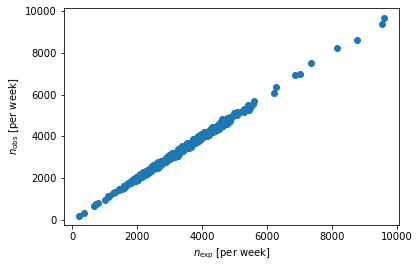

In [125]:
_ = plt.scatter(nExp_LE, nObs_LE)
_ = plt.xlabel(r"$n_{\rm exp}$ [per week]")
_ = plt.ylabel(r"$n_{\rm obs}$ [per week]")
correl = np.corrcoef(nObs_LE, nExp_LE)
print("The expectect counts are %0.3f correlated with the observed counts" % correl[0,1])

### Is there a long-term trend to the Vela flux.

Let's use the correlation to see if there is a long-term trend to the Vela pulsar flux. 

Ok, so let's convert the time-axes to a nice small number (i.e., lets scale the time to years, and let's set the zero point to something in the middle of the time range).  This will save use having lots of really big numbers floating around, which would happen if we left the time in seconds since 2001.

In [126]:
date_YEAR = 2001 +  (date_MET / (24*3600*365))
years_since_mid_2014 = date_YEAR  - 2014.5

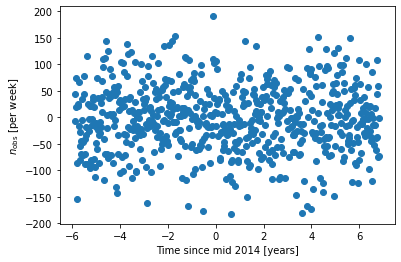

In [127]:
excess_counts = nObs_LE-nExp_LE
_ = plt.scatter(years_since_mid_2014, excess_counts)
_ = plt.xlabel(r"Time since mid 2014 [years]")
_ = plt.ylabel(r"$n_{\rm obs}$ [per week]")

In [128]:
cov = np.cov(years_since_mid_2014, excess_counts)
correl = np.corrcoef(years_since_mid_2014, excess_counts)

### Let's have a look at the pieces of the covariance matrix

In [129]:
print("The xx element of the covarience matrix is %.2f years**2" %  cov[0,0])
print("The standard deviation of the x element (i.e., the year) is %.2f years" % np.sqrt(cov[0,0]))
print("The yy element of the covarience matrix is %.2f counts**2" %  cov[1,1])
print("The standard deviation of the yy element (i.e., the excess counts) is %.1f counts" % np.sqrt(cov[1,1]))
print("The xy element of the covarience matrix is %.2f years*counts" %  cov[0,1])
print("The x-y correlation coefficient is %0.3f" % correl[1,0])

The xx element of the covarience matrix is 13.65 years**2
The standard deviation of the x element (i.e., the year) is 3.69 years
The yy element of the covarience matrix is 3973.27 counts**2
The standard deviation of the yy element (i.e., the excess counts) is 63.0 counts
The xy element of the covarience matrix is -2.95 years*counts
The x-y correlation coefficient is -0.013


# Question for discussion

3.1 Do you think that the small correlation we found in the previous cell is going to be statistically significant?  Why or why not?  Does the contrast between the last two plots affect your opinion?  What about the difference between the correlation values. 